#**Loading the Dataset**


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

***%matplotlib inline***

This is a Jupyter Notebook magic command (not standard Python).
 It tells Jupyter to display any Matplotlib plots directly inside the notebook, right below the code cell.
 Without this, plots might open in a separate window (depending on your environment)

In [52]:
# from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

***In scikit-learn***, datasets like Iris or Boston are often returned as a sklearn.utils.Bunch object.

In [53]:
# Wrap the dataset into a sklearn.utils.Bunch object
# so it behaves like sklearn's built-in datasets (e.g., load_iris).
# - data: feature matrix (506 samples × 13 features)
# - target: median house value in $1000s
# - feature_names: names of the 13 features
# - DESCR: short description of the dataset
from sklearn.utils import Bunch
boston = Bunch(
    data = data,
    target = target,
    feature_names = [
        "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
        "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
    ],
    DESCR="Boston Housing dataset"
)


In [54]:
print(boston.data)
pd.DataFrame(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#**Preparing the Dataset**







In [55]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
dataset["PRICE"] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [57]:
## Summarizing the stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
## Check the messing value
dataset.isnull().sum() #  calcule the sum of each  colomns


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

##**Analyzing The Correlated Features**

**why correlation is very important in any Linear Regression Problem?**

This goes to the heart of linear regression.

Correlation is important in linear regression because:

🔹 1. Linear regression assumes a linear relationship

Linear regression tries to fit a straight line between the **independent variable(s) (X)** and **the dependent variable (y)**.

If there’s no correlation (or very weak), a straight line won’t describe the data well → predictions will be poor.

If there’s a strong correlation, linear regression can capture that relationship effectively.

🔹 2. Correlation helps identify useful predictors

Variables highly correlated with the target are usually better predictors.

If correlation between X and y is close to 0, including that variable may not improve the model.

🔹 3. Correlation reveals multicollinearity

When two independent variables are highly correlated with each other, it causes multicollinearity.

In regression, this makes coefficient estimates unstable and hard to interpret (the model can’t tell which variable really explains the change in y).

Example: in the Boston dataset, TAX and RAD are highly correlated. Including both can confuse the model.

🔹 4. Helps with feature selection & interpretation

Correlation analysis is often the first step before regression:

Which features matter most for predicting y?

Are some features redundant because they are strongly correlated with others?

🔹 5. Relation to R² (coefficient of determination)

In simple linear regression (1 feature), the square of the Pearson correlation coefficient (r²) is exactly the R² value.

This means correlation directly tells you how much of the variance in y is explained by x.

**Correlation ranges from -1 to 1:**

Close to 1 → strong positive correlation

Close to -1 → strong negative correlation

Close to 0 → weak or no correlation

**In short:**

Correlation tells you whether linear regression is appropriate.

Strong correlation → good predictor.

No correlation → regression won’t work well.

High correlation between predictors → beware of multicollinearity.

In [59]:
### Exploratory Data Analysis
## Correlation
dataset.corr() # corr_matrix
dataset.corr()['PRICE'].sort_values(ascending=False)



PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

***seaborn (aliased as sns)***



>is a Python library for statistical data visualization.

It makes plots easier to create and prettier than raw Matplotlib.

Common uses:

Correlation heatmaps (sns.heatmap)

Pairplots (sns.pairplot)

Boxplots, violin plots, regression plots, etc.

KeyboardInterrupt: 

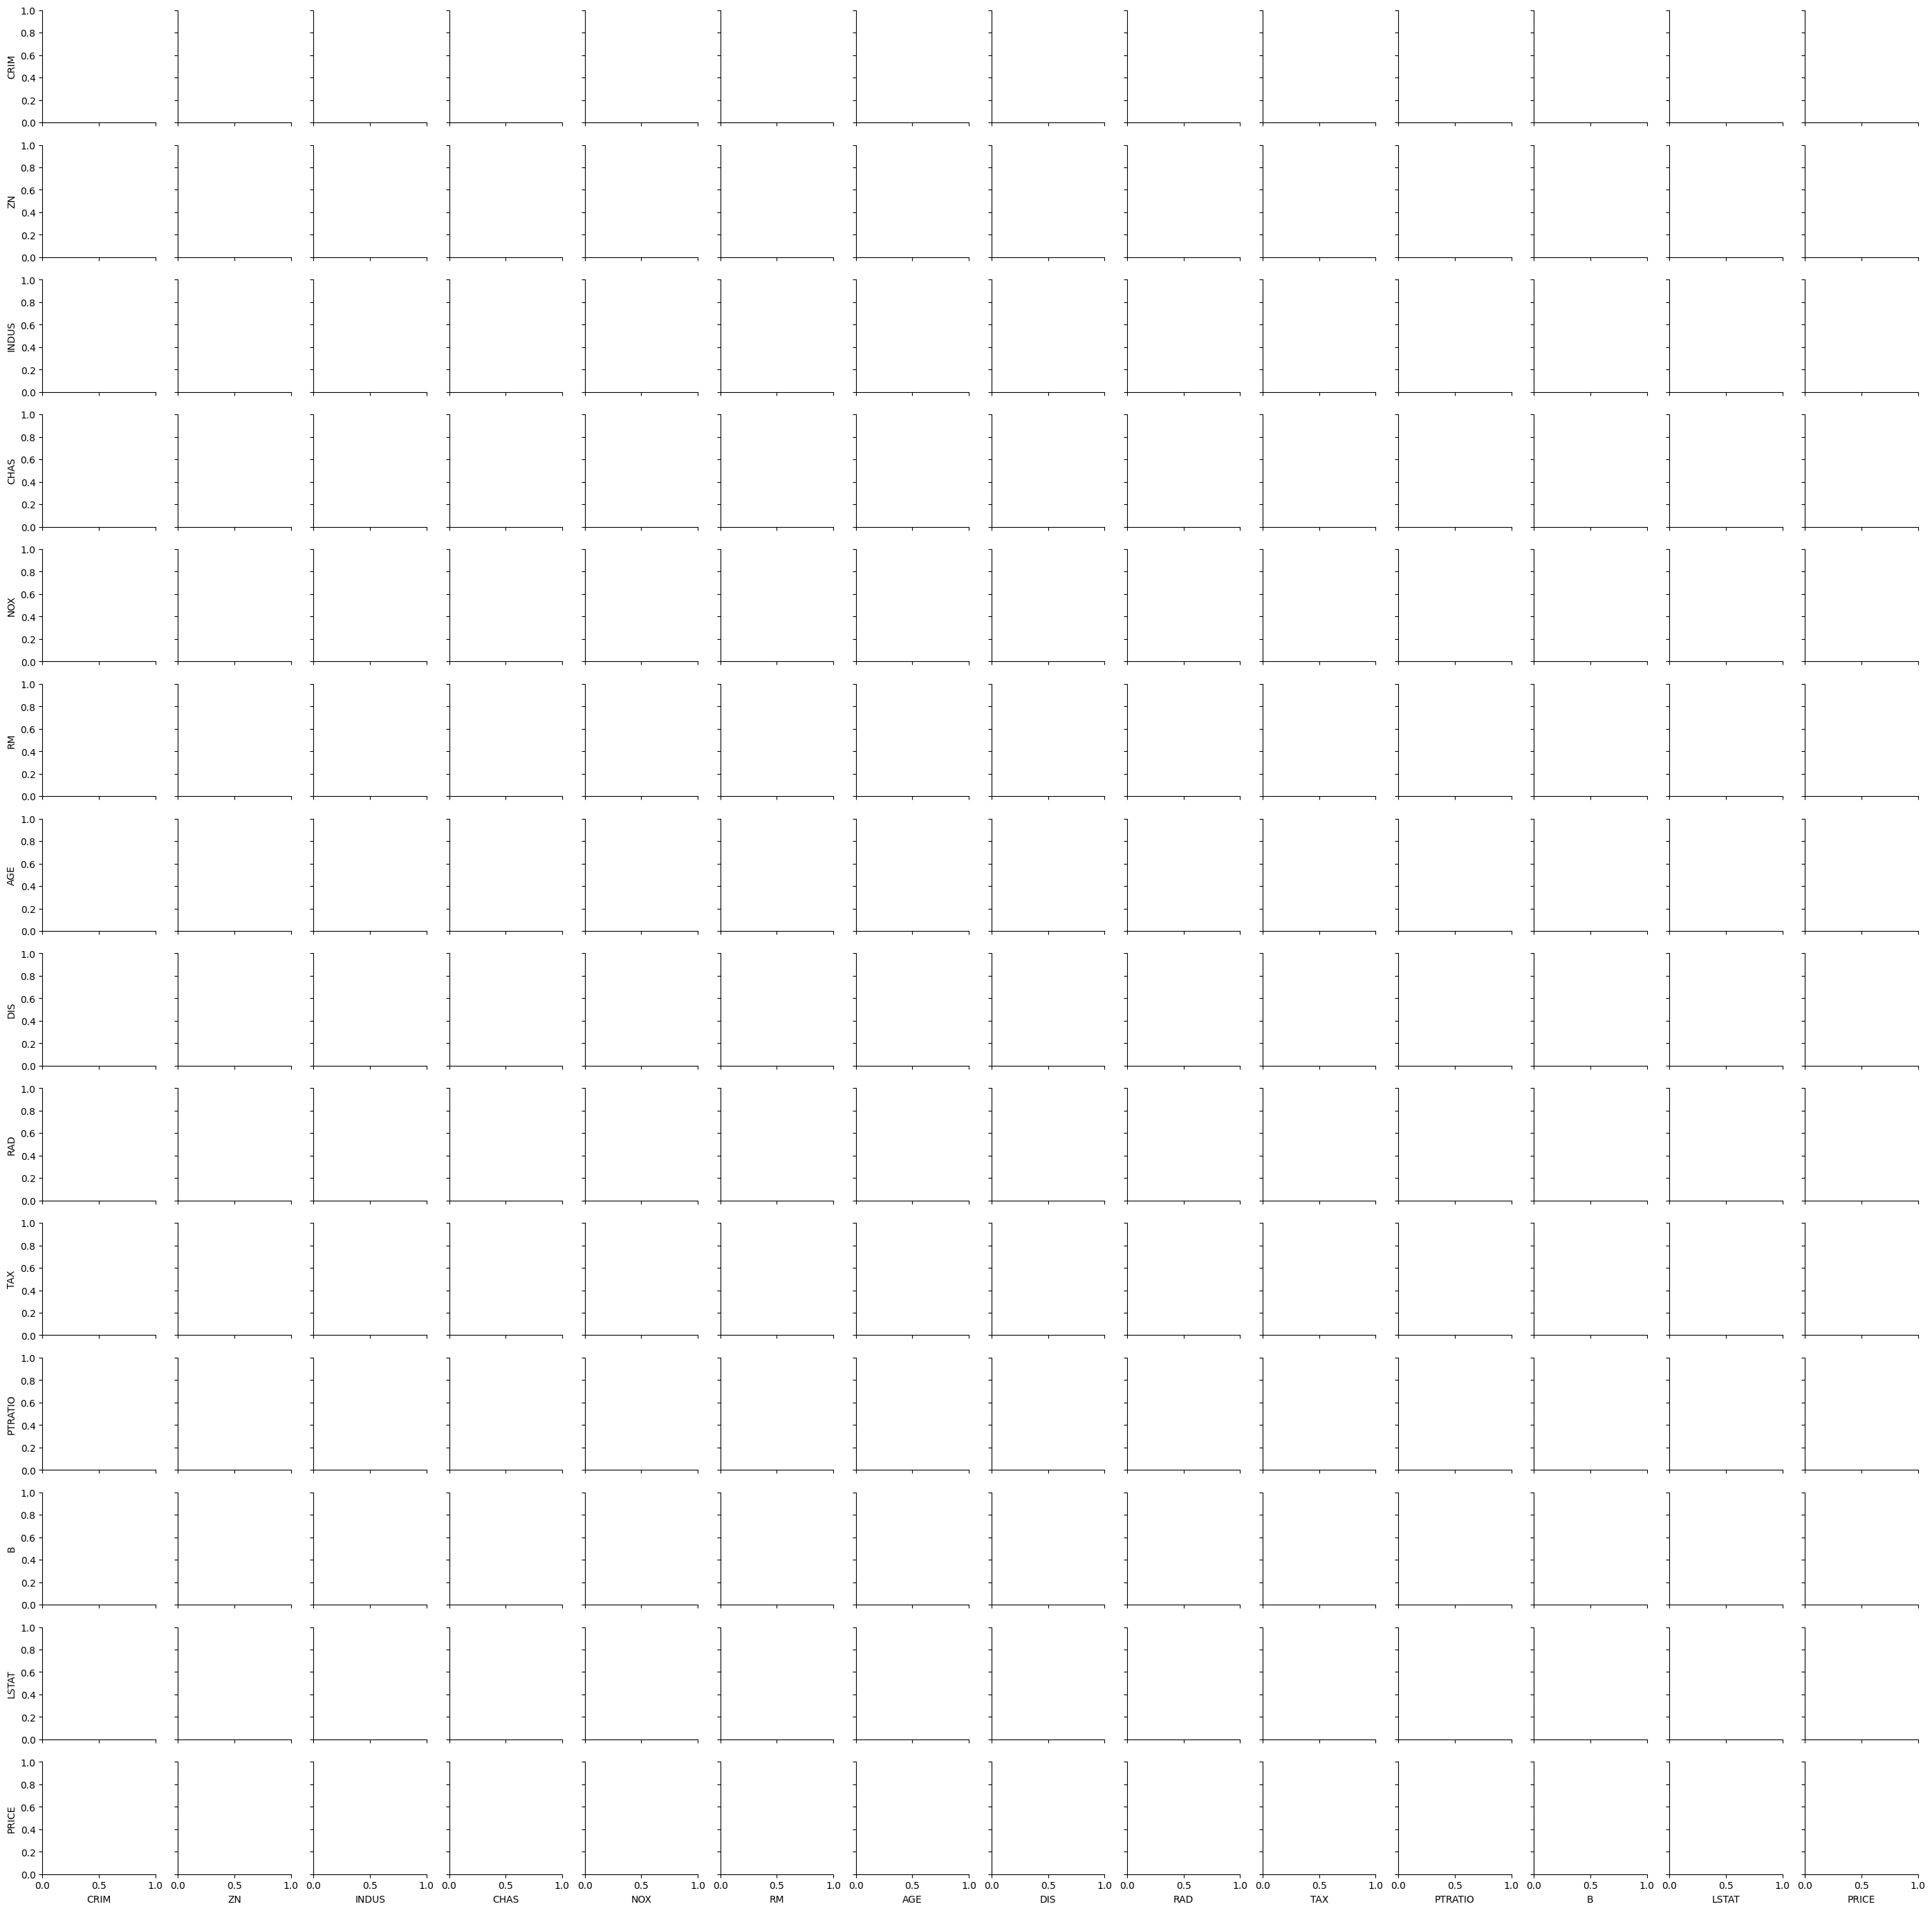

In [60]:
# visualize the Correlation
import seaborn as sns
sns.pairplot(dataset) #automatically creates a grid of scatter plots for all pairs of variables in your DataFrame.


<Axes: xlabel='RM', ylabel='PRICE'>

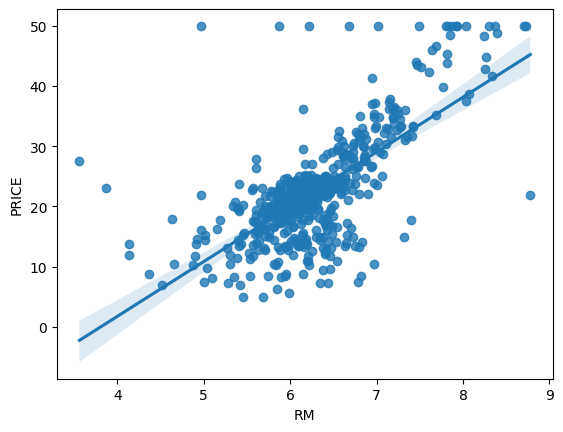

In [ ]:
sns.regplot(x='RM',y='PRICE',data = dataset) #regplot is used for visualizing the relationship between two specific variables, along with a linear regression fit line.

Text(0, 0.5, 'PRICE')

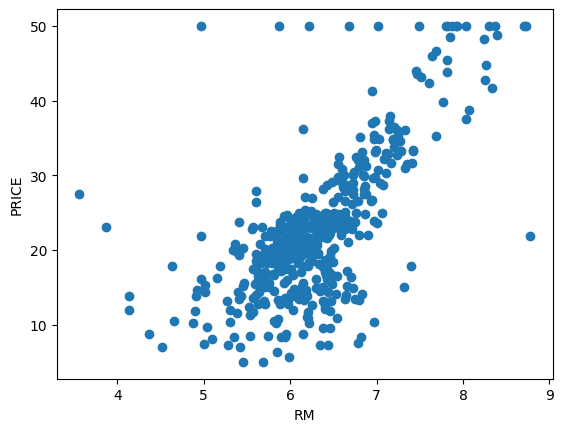

In [ ]:
plt.scatter(dataset['RM'],dataset['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')

In [ ]:
## independent and dependent features
X = dataset.iloc[:,:-1] #dataframe.iloc[rows, columns]
y = dataset.iloc[:,-1]

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

***StandardScaler (sklearn.preprocessing)***

Purpose: Standardize features so each has mean = 0 and standard deviation = 1.

Why: Helps machine learning models perform better, especially those sensitive to feature scale (linear regression with regularization, SVM, KNN, etc.).

Steps:

Import: from sklearn.preprocessing import StandardScaler

Create scaler object: scaler = StandardScaler()

Fit & transform data: X_scaled = scaler.fit_transform(X)

fit → computes mean & std of each feature

transform → standardizes the features
**Xscaled ​= (X−mean) / std**


Effect: Each column of X_scaled now has mean 0 and standard deviation 1.


##StandardScaler: Detailed Explanation

Purpose:

Standardize features so each has mean = 0 and standard deviation = 1.

Helps ML algorithms (like linear regression, SVM, KNN, regularized models) perform better and avoid bias due to feature scale differences.

1️⃣ **Fit on training data**

scaler.fit(X_train)

fit() calculates and stores statistics from training data:

 → mean of feature j
 → standard deviation of feature j

These are stored in scaler attributes:

**scaler.mean_** → mean of each feature

**scaler.scale_** → standard deviation of each feature

**Key:** Fit is done only on training data to avoid leaking information from the test set.

2️⃣ **Transform training and test data**

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
	​

Uses the stored mean and std from training data to scale any new data (train or test).

**Why not fit on test data?**

Fitting on test data would compute a different mean and std, shifting the scale and introducing data leakage.

Always use training statistics to ensure consistency and correct model evaluation.

3️⃣ **Workflow Summary**

Split data → X_train, X_test

Initialize scaler → scaler = StandardScaler()

Fit scaler on training data → scaler.fit(X_train)

Transform training data → X_train_scaled = scaler.transform(X_train)

Transform test data → X_test_scaled = scaler.transform(X_test)

After scaling:

Each feature has mean 0 and std 1 (training set)

Test set is scaled consistently with training data

4️⃣ **Benefits**

Ensures features are on the same scale → faster convergence for gradient-based algorithms.

Makes coefficients in linear regression more interpretable.

Essential for regularized models (Ridge, Lasso).

In [ ]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

#**Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Coefficients and the intercept
print(regression.coef_)
print(regression.intercept_)


[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903955


In [ ]:
#on whith paramters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [ ]:
### Prediction with Test Data
reg_pred =  regression.predict(X_test)
reg_pred


array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

Text(0, 0.5, 'pred')

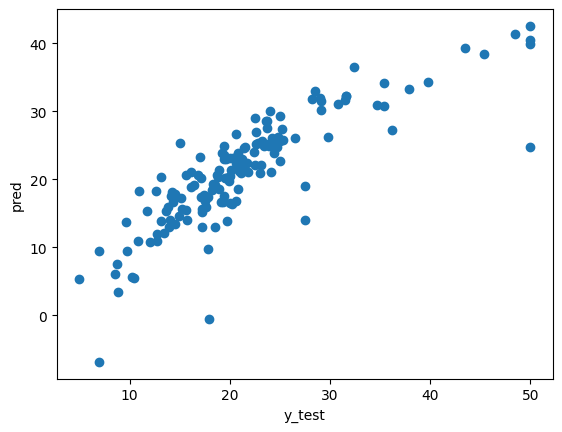

In [ ]:
# plot a scarter plot for the prdiction
plt.scatter(y_test,reg_pred)
plt.xlabel('y_test')
plt.ylabel('pred')

In [ ]:
#residuls
residuls = y_test - reg_pred
residuls

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: PRICE, Length: 152, dtype: float64

***Why plot residuals?***

In linear regression, residuals should ideally follow a normal distribution centered around 0.

Plotting residuals helps check assumptions of linear regression:

Linearity: No systematic patterns

Homoscedasticity: Equal variance across predictions

Normality: Residuals approximately bell-shaped

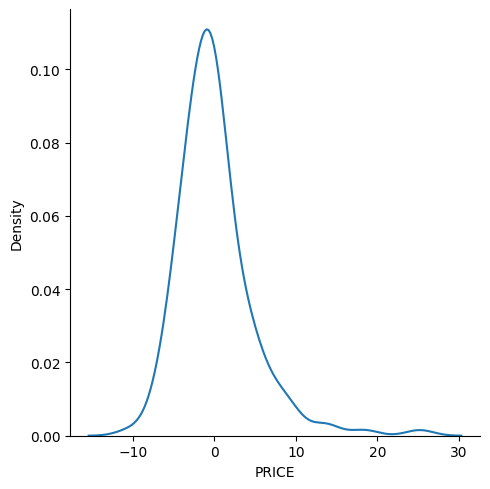

In [ ]:
#plot this residuals
sns.displot(residuls,kind='kde')

####***residuals VS predictions scatter plot :***

 which is another key diagnostic tool in regression. Let’s break it down:

plt.scatter(reg_pred, residuls)


**Why we plot this**

This plot helps check assumptions of linear regression:

Linearity: Residuals should be randomly scattered around 0 (no pattern).

Homoscedasticity: Spread of residuals should be roughly the same across all predicted values.

Outliers: Points far from 0 are potential outliers.

✅ Ideal pattern: cloud of points, evenly spread, centered at 0.

❌ Bad signs: clear patterns (like curves, funnel shapes), meaning model assumptions are violated

Text(0, 0.5, 'res')

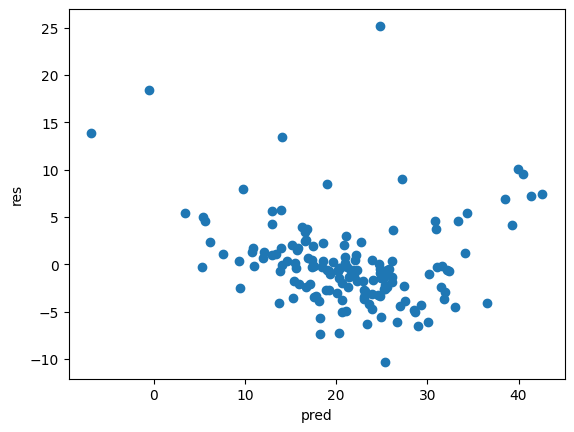

In [ ]:
## Scatter plot with respect to prdiction and residuals
plt.scatter(reg_pred,residuls)
plt.xlabel('pred')
plt.ylabel('res')

##**Error Metrics**

To check if it’s good or not, we compare the predictions (reg_pred) with the real values (y_test).
For that, we use error metrics.

**Metrics we are using**

1- MAE (Mean Absolute Error)


> Formula:

MAE=1/n * ∑∣yi−y^i∣

> It’s the average absolute error. Easy to understand: “On average, the model is off by this much.”

2- MSE (Mean Squared Error)
>Formula:

MSE= 1/n * ∑((yi​−y^​i​)^2) avec 1<=i<=n

> Similar to MAE, but it squares the errors. This punishes big mistakes more.

3- RMSE (Root Mean Squared Error)
>Formula:

𝑅𝑀𝑆𝐸=sqrt(𝑀𝑆𝐸)



>It’s just the square root of MSE, which brings the error back to the same units as your target variable.



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.517444231177205
4.6386899261728205


###**R square and adjusted R square**
####****R square**
>Formula : R2 = 1 - SSR / SST

R^2 : coefficient of determination

SSR : sum of squares of residuals

SST : total sum of squares

####****Adjust R2**
>Formula : Adjust R2 = [(1-R2)*(n-1)/(n-k-1)]

n : nb of observations

k : the nb of predictor variables

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
score

0.7112260057484934

In [ ]:
n = len(y_test)
k = X_test.shape[1]
[(1-score)*(n-1)/(n-k-1)]

[0.3159773415360688]

#**New Data Prediction**

In [ ]:
boston.data[0].reshape(1,-1).shape
# reshape(rows,colomuns)
# 1 means we want 1 row.
# -1 tells NumPy: “Automatically calculate the number of columns based on the original size.”
#boston.data[2].shape #(rows,columns)

(1, 13)

In [ ]:
scaler.transform(boston.data[0].reshape(1,-1)) # transform the new data
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

c:\MyPython\endtoendMLproject\bostonhouseprincing\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\MyPython\endtoendMLproject\bostonhouseprincing\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

#**Pickling The Model file For Deployment**

>***What is Pickling?***

Pickling means saving (serializing) a Python object — such as your trained ML model — to a binary file on disk so you can reuse it later without retraining.

The saved file is called a pickle file and usually has the extension .pkl or .sav.

>***Why is it important?***

Because after you train a model:

You don’t want to retrain it every time you want to use it.

You might want to deploy it in a web app, desktop app, or API.

Pickling allows you to save the trained model once, and later load it instantly to make predictions.

>***Library used: pickle***

Python’s built-in module pickle is used for this.

🔹 Example
import pickle

> Save (Pickle) the model

pickle.dump(regressor, open('reg_model.pkl', 'wb'))

Explanation:

pickle.dump(obj, file) saves an object to a file.

- 'wb' means write binary mode.
- 'reg_model.pkl' is the filename.

>Load (Unpickle) the model later
- Load the model from disk
loaded_model = pickle.load(open('reg_model.pkl', 'rb'))

- Use it for prediction

predictions = loaded_model.predict(X_test)
Explanation:
- 'rb' = read binary mode.


loaded_model is now your trained model, ready to use.


pickle is the Python library that performs these two actions

>***Serialization*** = converting a Python object into a binary format (bytes)
so it can be saved or transmitted.

>***Deserialization*** = converting that binary data back into the original object.

In [ ]:
import pickle

In [61]:
pickle.dump(regression,open('regmodel.pkl','wb'))
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [ ]:
## prediction
pickle_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))
#pickle_model.predict(scaler.transform(boston.data[0].reshape(1,-1))) - boston.target[0]
# When it’s “not ok”
# If you see:
# Residuals much larger than your RMSE (e.g., 20 or 30)
# A consistent positive/negative pattern (model always too high or too low)
# then your model might not be well-fitted (maybe missing a key feature, or needs nonlinear terms).

c:\MyPython\endtoendMLproject\bostonhouseprincing\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])